# Statistics

## Modifying stat_smooth
為各自 group 以及所有 data 畫 smooth line 並自訂顏色、Legend

In [2]:
library(ggplot2)


In [4]:
if (!require("RColorBrewer")) {
  install.packages("RColorBrewer")
  library(RColorBrewer)
}

Loading required package: RColorBrewer


In [6]:
options(repr.plot.width = 4, repr.plot.height = 3)

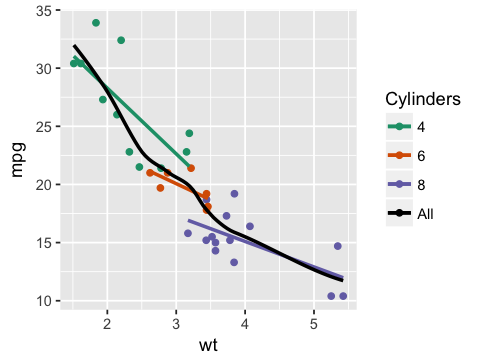

In [7]:
myColors <- c(brewer.pal(3, "Dark2"), "black")
ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) +
  geom_point() +
  stat_smooth(method = "lm", se = F, span = 0.75) +
  stat_smooth(method = "loess",
              aes(group = 1, col="All"),
              se = F, span = 0.7) +
  # Add correct arguments to scale_color_manual
  scale_color_manual("Cylinders", values = myColors)

## Modifying stat_smooth (2)

In [22]:
Vocab <- read.csv("Vocab.csv")

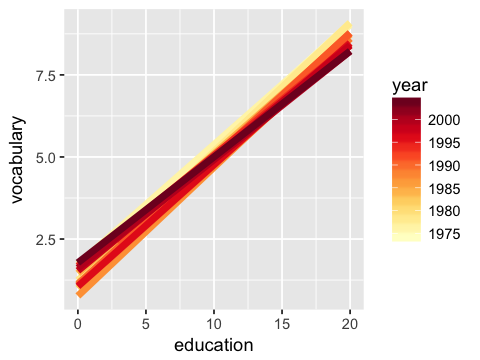

In [23]:
ggplot(Vocab, aes(x = education, y = vocabulary, col = year, group = factor(year))) +
  stat_smooth(method = "lm", se = F, alpha = 0.6, size = 2) +
  scale_color_gradientn(colors = brewer.pal(9,"YlOrRd"))

### Stat_sum
- stat_sum 是 geom_count 背後呼叫的東西，是 geom_point 的變形，以 size 當作 aesthetics
- 畫 smooth lines 並 mapping 到 color aesthetics 以建立 legend

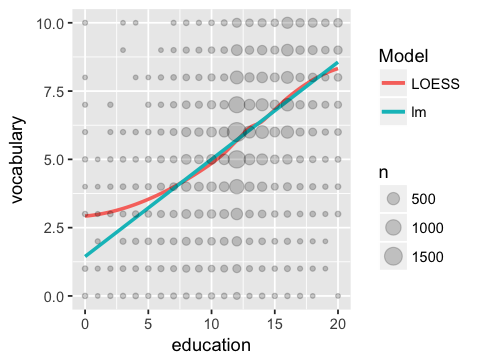

In [28]:
p <- ggplot(Vocab, aes(x = education, y = vocabulary)) +
       stat_smooth(method = "loess", aes(col = "x"), se = F) +
       stat_smooth(method = "lm", aes(col = "y"), se = F) +
       scale_color_discrete("Model", labels = c("x" = "LOESS", "y" = "lm"))
p + stat_sum(alpha = 0.2) + scale_size(range = c(1, 5))